In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [179]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [180]:
conso_file = r"Y:\Documents\conso.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260267 entries, 0 to 260266
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  260267 non-null  int64  
 1   kWh       260267 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.0 MB


<Axes: >

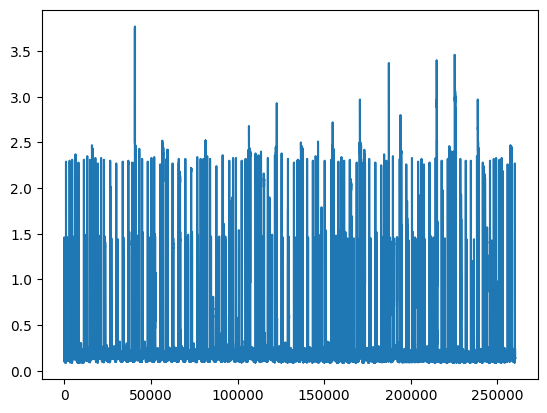

In [181]:
conso_data['kWh'].plot()

In [182]:
l=len(conso_data)-1
l

260266

In [183]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [184]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
260262,26124,0.14,26.124,137.804318,6247646318
260263,26213,0.14,26.213,137.336436,6247672531
260264,25579,0.14,25.579,140.740451,6247698110
260265,25683,0.14,25.683,140.170541,6247723793
260266,26166,0.14,26.166,137.583123,6247749959


In [185]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

6247749959000

In [186]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2024, 3, 7, 2, 3, 22, 565737)

In [187]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 02:03:48.854737,07/03/24
1,26243,0.14,26.243,137.179438,52532,2024-03-07 02:04:15.097737,07/03/24
2,25885,0.14,25.885,139.076685,78417,2024-03-07 02:04:40.982737,07/03/24
3,25754,0.14,25.754,139.784111,104171,2024-03-07 02:05:06.736737,07/03/24
4,25774,0.14,25.774,139.675642,129945,2024-03-07 02:05:32.510737,07/03/24
...,...,...,...,...,...,...,...
260262,26124,0.14,26.124,137.804318,6247646318,2024-05-18 09:30:48.883737,18/05/24
260263,26213,0.14,26.213,137.336436,6247672531,2024-05-18 09:31:15.096737,18/05/24
260264,25579,0.14,25.579,140.740451,6247698110,2024-05-18 09:31:40.675737,18/05/24
260265,25683,0.14,25.683,140.170541,6247723793,2024-05-18 09:32:06.358737,18/05/24


In [188]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('18/05/24', 5, 2024)

In [189]:
here = now.strftime('%H:%M:%S')
here

'09:32:41'

In [190]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [191]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
259086,27451,0.13,27.451,131.142763,6213401320,2024-05-18 00:00:03.885737,18/05/24
259087,27146,0.13,27.146,132.616223,6213428466,2024-05-18 00:00:31.031737,18/05/24
259088,25453,0.14,25.453,141.437159,6213453919,2024-05-18 00:00:56.484737,18/05/24
259089,25469,0.14,25.469,141.348306,6213479388,2024-05-18 00:01:21.953737,18/05/24
259090,26475,0.14,26.475,135.977337,6213505863,2024-05-18 00:01:48.428737,18/05/24
...,...,...,...,...,...,...,...
260262,26124,0.14,26.124,137.804318,6247646318,2024-05-18 09:30:48.883737,18/05/24
260263,26213,0.14,26.213,137.336436,6247672531,2024-05-18 09:31:15.096737,18/05/24
260264,25579,0.14,25.579,140.740451,6247698110,2024-05-18 09:31:40.675737,18/05/24
260265,25683,0.14,25.683,140.170541,6247723793,2024-05-18 09:32:06.358737,18/05/24


In [192]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [193]:
data = list(df_grp['kWh'])
print(data)


[3.06, 3.793, 3.082, 3.531, 4.539, 3.562, 3.55, 3.637, 3.571, 3.348, 3.36, 4.403, 3.508, 3.441, 3.553, 3.734, 3.531, 3.346, 3.888, 3.418, 3.463, 3.638, 3.77, 3.654, 3.831, 3.834, 3.818, 3.421, 3.473, 4.413, 3.407, 4.076, 3.779, 4.06, 3.425, 3.577, 3.443, 4.13, 3.266, 3.318, 3.706, 3.689, 4.226, 3.277, 3.386, 3.76, 4.08, 3.513, 3.303, 3.284, 3.066, 3.746, 3.819, 3.783, 3.409, 3.45, 3.518, 3.265, 3.607, 3.418, 3.335, 3.54, 3.655, 3.179, 3.1, 3.404, 3.594, 4.031, 3.53, 3.315, 3.341, 4.106, 1.181]


In [194]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [195]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(15, 7)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [196]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start

    #df.iloc[1001:2000]['dates']#.tail(1)
    print(f'{start}\t{end}\t{period}\t{conso}')


In [197]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [198]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.330494
dtype: float64

In [199]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.565301
dtype: float64

In [200]:
last=df_grp.iloc[-1]['kWh']
last

1.181

In [201]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:3,27451,0.13,27.451,131.142763,6213401320,2024-05-18 00:00:03.885737,18/05/24
0:0:31,27146,0.13,27.146,132.616223,6213428466,2024-05-18 00:00:31.031737,18/05/24
0:0:56,25453,0.14,25.453,141.437159,6213453919,2024-05-18 00:00:56.484737,18/05/24
0:1:21,25469,0.14,25.469,141.348306,6213479388,2024-05-18 00:01:21.953737,18/05/24
0:1:48,26475,0.14,26.475,135.977337,6213505863,2024-05-18 00:01:48.428737,18/05/24
...,...,...,...,...,...,...,...
9:30:48,26124,0.14,26.124,137.804318,6247646318,2024-05-18 09:30:48.883737,18/05/24
9:31:15,26213,0.14,26.213,137.336436,6247672531,2024-05-18 09:31:15.096737,18/05/24
9:31:40,25579,0.14,25.579,140.740451,6247698110,2024-05-18 09:31:40.675737,18/05/24


In [202]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:3',
             days   kWh
  heure                
  0:0:3  18/05/24  0.13),
 ('0:0:31',
              days   kWh
  heure                 
  0:0:31  18/05/24  0.13),
 ('0:0:56',
              days   kWh
  heure                 
  0:0:56  18/05/24  0.14),
 ('0:1:21',
              days   kWh
  heure                 
  0:1:21  18/05/24  0.14),
 ('0:1:48',
              days   kWh
  heure                 
  0:1:48  18/05/24  0.14),
 ('0:2:15',
              days   kWh
  heure                 
  0:2:15  18/05/24  0.13),
 ('0:2:42',
              days   kWh
  heure                 
  0:2:42  18/05/24  0.13),
 ('0:3:8',
             days   kWh
  heure                
  0:3:8  18/05/24  0.13),
 ('0:3:35',
              days   kWh
  heure                 
  0:3:35  18/05/24  0.13),
 ('0:4:2',
             days   kWh
  heure                
  0:4:2  18/05/24  0.13),
 ('0:4:29',
              days   kWh
  heure                 
  0:4:29  18/05/24  0.13),
 ('0:4:56',
              days   

In [203]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:3',
  heure
  0:0:3    0.13
  Name: kWh, dtype: float64),
 ('0:0:31',
  heure
  0:0:31    0.13
  Name: kWh, dtype: float64),
 ('0:0:56',
  heure
  0:0:56    0.14
  Name: kWh, dtype: float64),
 ('0:1:21',
  heure
  0:1:21    0.14
  Name: kWh, dtype: float64),
 ('0:1:48',
  heure
  0:1:48    0.14
  Name: kWh, dtype: float64),
 ('0:2:15',
  heure
  0:2:15    0.13
  Name: kWh, dtype: float64),
 ('0:2:42',
  heure
  0:2:42    0.13
  Name: kWh, dtype: float64),
 ('0:3:8',
  heure
  0:3:8    0.13
  Name: kWh, dtype: float64),
 ('0:3:35',
  heure
  0:3:35    0.13
  Name: kWh, dtype: float64),
 ('0:4:2',
  heure
  0:4:2    0.13
  Name: kWh, dtype: float64),
 ('0:4:29',
  heure
  0:4:29    0.13
  Name: kWh, dtype: float64),
 ('0:4:56',
  heure
  0:4:56    0.13
  Name: kWh, dtype: float64),
 ('0:5:23',
  heure
  0:5:23    0.13
  Name: kWh, dtype: float64),
 ('0:5:50',
  heure
  0:5:50    0.13
  Name: kWh, dtype: float64),
 ('0:6:16',
  heure
  0:6:16    0.13
  Name: kWh, dtype: float64),
 

In [204]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [205]:
df.iloc[0].dates

Timestamp('2024-05-18 00:00:03.885737')

In [206]:
for p in range(1,6):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-05-18 00:00:03.885737	2024-05-18 08:33:08.505737	0 days 08:33:04.620000	1000
2024-05-18 08:33:08.505737	2024-05-18 09:32:32.524737	0 days 00:59:24.019000	181


In [207]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('09:32:41', 1.181, 1181)

In [208]:
df_grp.tail(7)

,kWh
days,
12/05/24,3.594
13/05/24,4.031
14/05/24,3.530
15/05/24,3.315
16/05/24,3.341
17/05/24,4.106
18/05/24,1.181


Text(0.5, 1.0, 'Week conso')

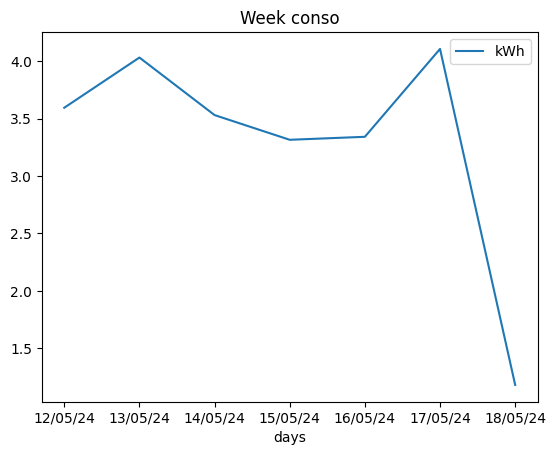

In [209]:
# week conso
df_grp.tail(7).plot()
plt.title('Week conso')

In [226]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [211]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


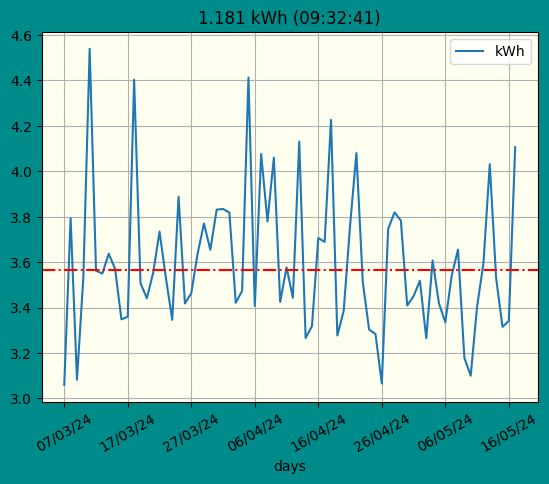

In [212]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

df_grp.iloc[:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


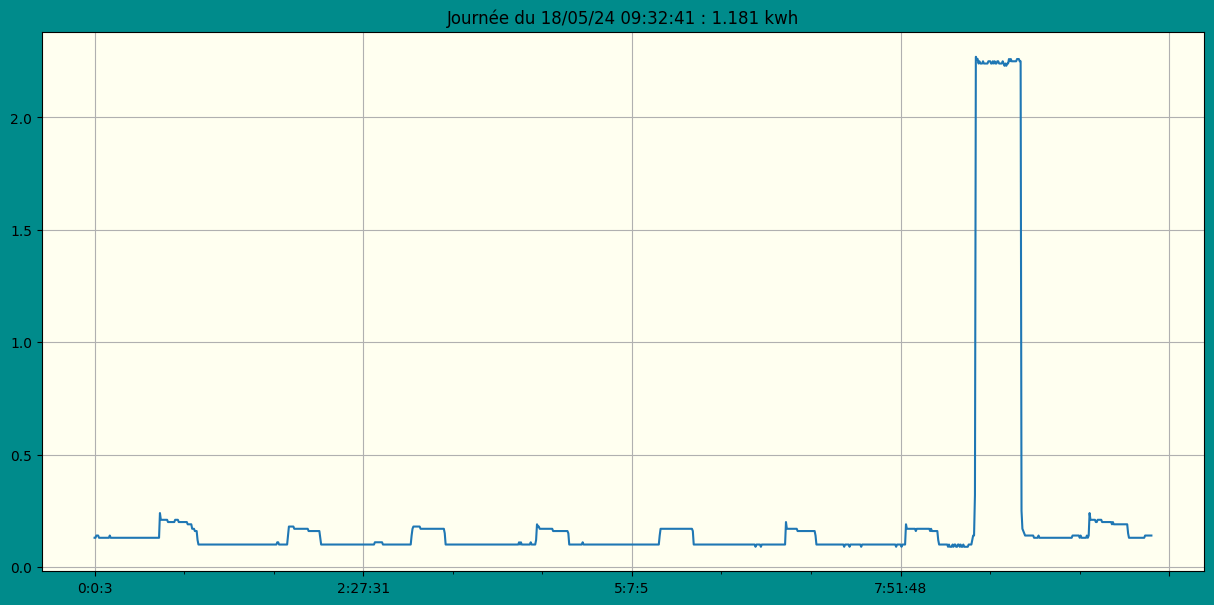

In [213]:
show(day,bgcolor='ivory')

In [214]:
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours#.info()


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure,hours
259086,27451,0.13,27.451,131.142763,6213401320,2024-05-18 00:00:03.885737,18/05/24,0:0:3,00
259087,27146,0.13,27.146,132.616223,6213428466,2024-05-18 00:00:31.031737,18/05/24,0:0:31,00
259088,25453,0.14,25.453,141.437159,6213453919,2024-05-18 00:00:56.484737,18/05/24,0:0:56,00
259089,25469,0.14,25.469,141.348306,6213479388,2024-05-18 00:01:21.953737,18/05/24,0:1:21,00
259090,26475,0.14,26.475,135.977337,6213505863,2024-05-18 00:01:48.428737,18/05/24,0:1:48,00
...,...,...,...,...,...,...,...,...,...
260262,26124,0.14,26.124,137.804318,6247646318,2024-05-18 09:30:48.883737,18/05/24,9:30:48,09
260263,26213,0.14,26.213,137.336436,6247672531,2024-05-18 09:31:15.096737,18/05/24,9:31:15,09
260264,25579,0.14,25.579,140.740451,6247698110,2024-05-18 09:31:40.675737,18/05/24,9:31:40,09
260265,25683,0.14,25.683,140.170541,6247723793,2024-05-18 09:32:06.358737,18/05/24,9:32:6,09


In [215]:

# group by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
groupedbyhour.count()


,kWh
hours,
00,139
01,115
02,104
03,115
04,115
05,116
06,112
07,104
08,173


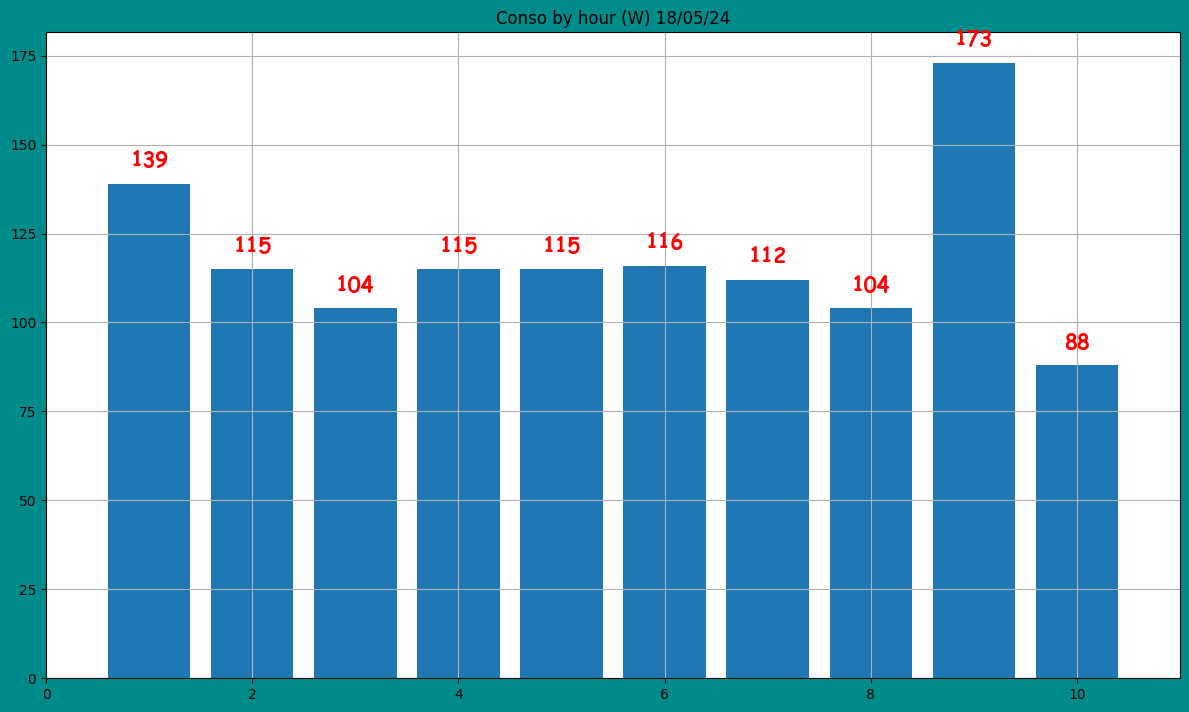

In [216]:
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(12, 7), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=15, fontweight='bold', color='red'
    )


In [217]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

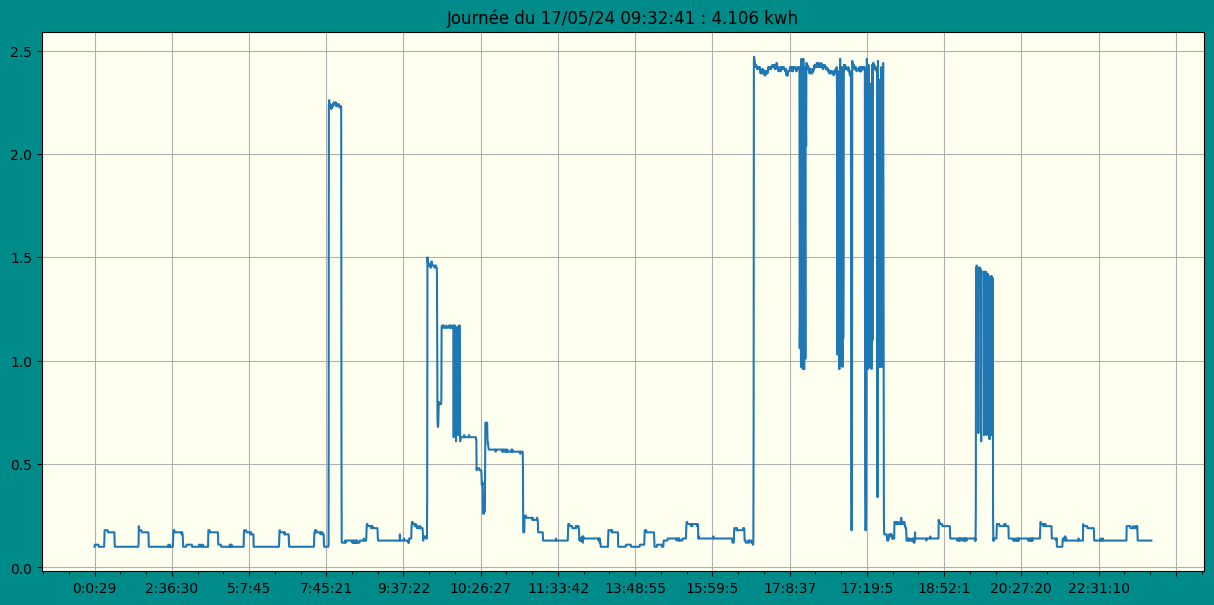

In [222]:
# plot any day
day = '17/05/24'
show(day,pltcolor='darkcyan')

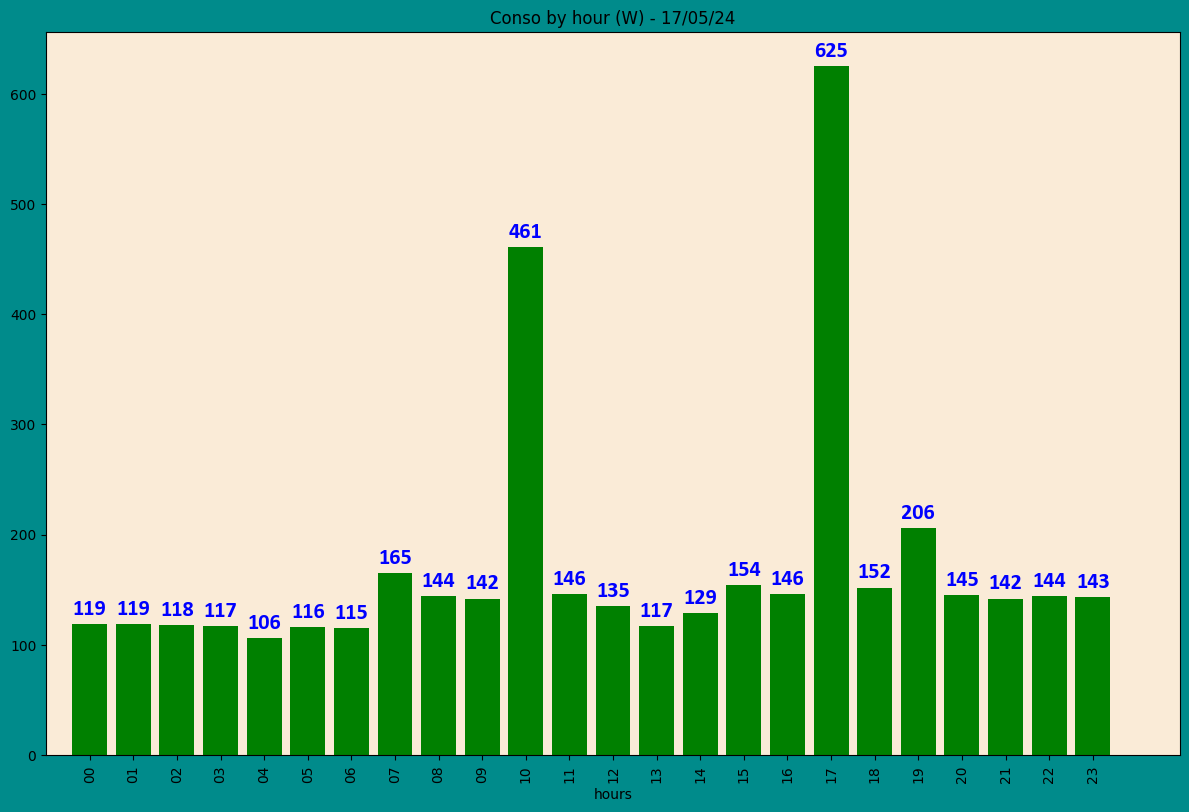

In [223]:
conso_byhour(day)

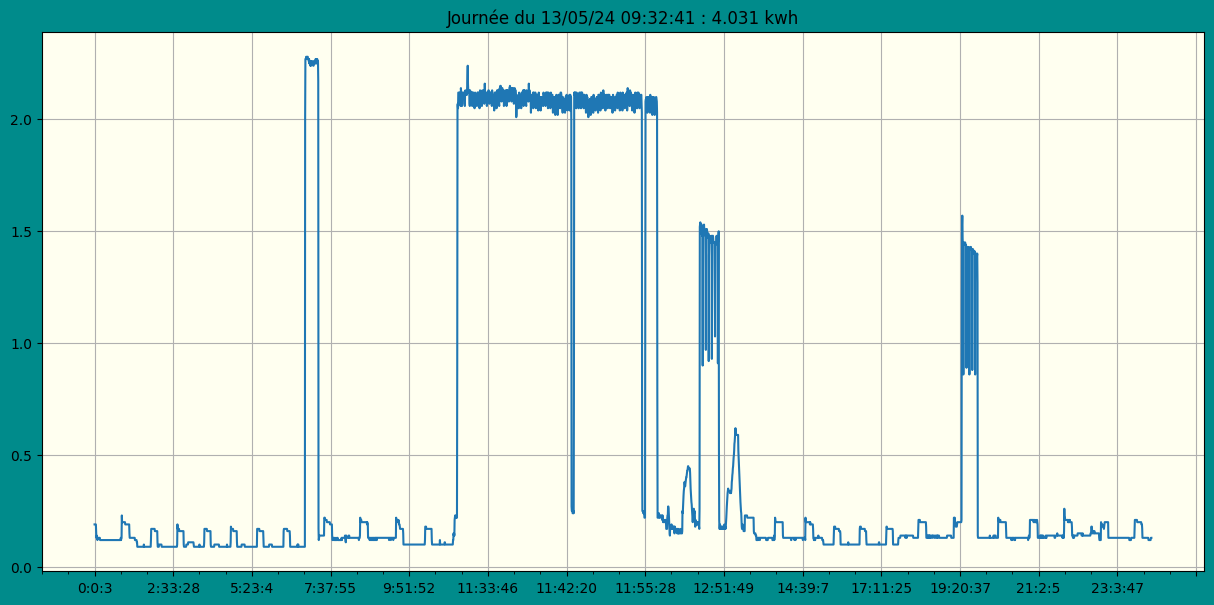

In [224]:
show('13/05/24')

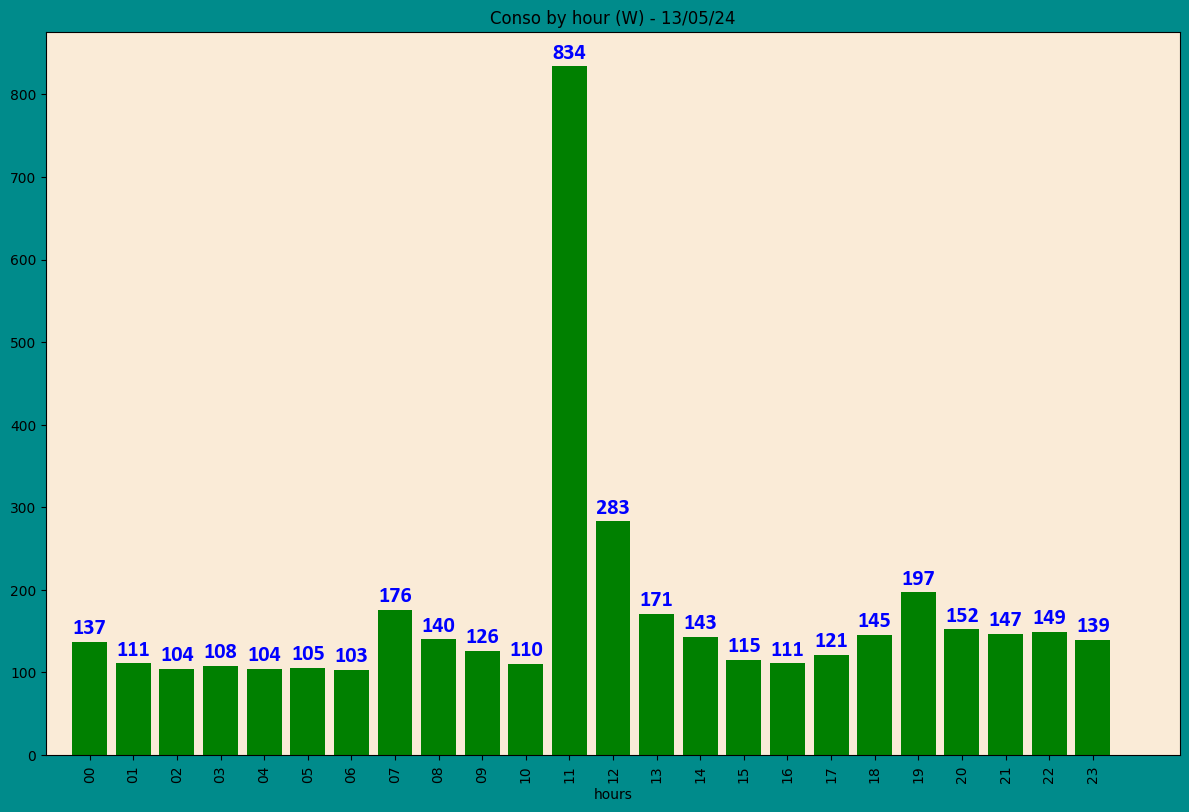

In [225]:
conso_byhour('13/05/24')